In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming it's in a CSV file named 'Influencer.csv')
df = pd.read_csv('Influencer.csv')

In [6]:
column_mapping = {col: col.replace(' ', '_') for col in df.columns}

# Rename the columns using the mapping
df.rename(columns=column_mapping, inplace=True)

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 200 non-null    int64  
 1   channel_info         200 non-null    object 
 2   influence_score      200 non-null    int64  
 3   followers            200 non-null    object 
 4   avg._likes           200 non-null    object 
 5   posts                200 non-null    object 
 6   60-day_eng_rate      200 non-null    float64
 7   new_post_avg._likes  200 non-null    object 
 8   total_likes          200 non-null    object 
 9   country_or_region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [9]:
df.rename(columns={'avg._likes': 'avg_likes'}, inplace=True)
df.rename(columns={'new_post_avg._likes': 'new_post_avg_likes'}, inplace=True)
df.rename(columns={'60-day_eng_rate': '60_day_eng_rate'}, inplace=True)

In [10]:
df.columns

Index(['rank', 'channel_info', 'influence_score', 'followers', 'avg_likes',
       'posts', '60_day_eng_rate', 'new_post_avg_likes', 'total_likes',
       'country_or_region'],
      dtype='object')

In [11]:
df['channel_info'] = df['channel_info'].str.strip().str.replace(r'^\\', '', regex=True)

In [12]:
df

,rank,channel_info,influence_score,followers,avg_likes,posts,60_day_eng_rate,new_post_avg_likes,total_likes,country_or_region
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,danbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,raisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,luansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [13]:
# Calculate the mode of the 'country_or_region' column
mode_country = df['country_or_region'].mode()[0]
df['country_or_region'].fillna(mode_country, inplace=True)

In [29]:
def convert_value(value):
    if isinstance(value, str):  # Check if the value is a string
        value = value.lower()  # Convert to lowercase
        if 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
    return value  # Return the value as-is if it's not a string

# Convert columns with suffixes to float
columns_to_convert = ['followers', 'avg_likes', 'new_post_avg_likes', 'total_likes']

for column in columns_to_convert:
    df[column] = df[column].apply(convert_value)

# Display the updated DataFrame
print(df)

     rank         channel_info  influence_score  followers  avg_likes  posts  \
0       1            cristiano               92      485.2        8.7    3.4   
1       2          kyliejenner               91      370.7        8.2    7.0   
2       3             leomessi               90      363.9        6.7  915.0   
3       4          selenagomez               93      348.8        6.1    1.9   
4       5              therock               91      339.4        1.8    6.8   
..    ...                  ...              ...        ...        ...    ...   
195   196  khabib_nurmagomedov               63       33.6      680.6    4.6   
196   197         danbilzerian               84       33.6        2.2    1.4   
197   198            raisa6690               80       33.6      227.8    4.2   
198   199          luansantana               79       33.5      193.3  865.0   
199   200           nancyajram               81       33.4      382.5    3.8   

     60_day_eng_rate  new_post_avg_like

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                200 non-null    int64  
 1   channel_info        200 non-null    object 
 2   influence_score     200 non-null    int64  
 3   followers           200 non-null    float64
 4   avg_likes           200 non-null    float64
 5   posts               200 non-null    float64
 6   60_day_eng_rate     200 non-null    float64
 7   new_post_avg_likes  200 non-null    float64
 8   total_likes         200 non-null    float64
 9   country_or_region   200 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [15]:
df['country_or_region'].unique()

array(['Spain', 'United States', 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

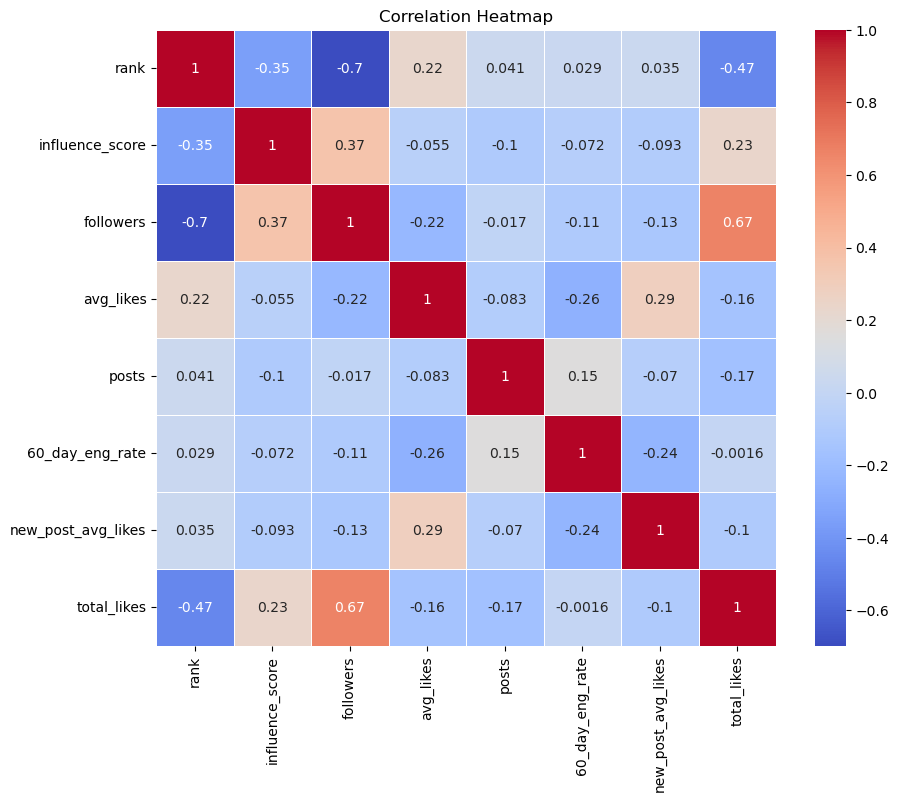

In [31]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

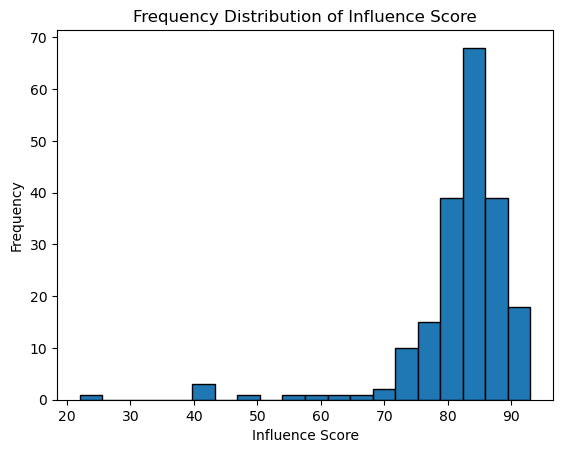

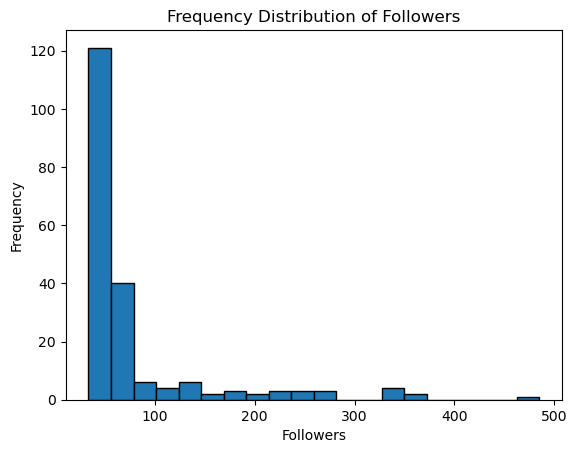

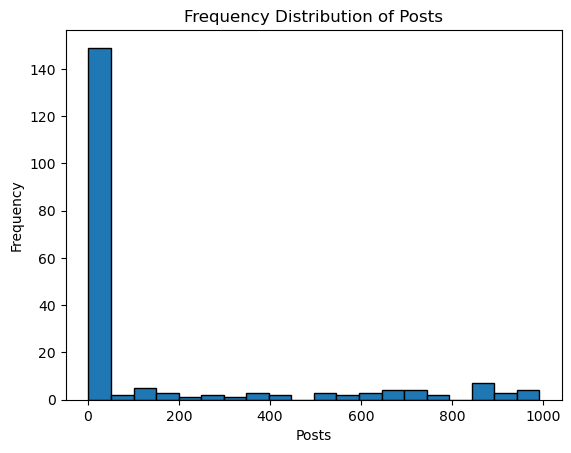

In [32]:
import matplotlib.pyplot as plt

# Frequency distribution of Influence Score
plt.hist(df['influence_score'], bins=20, edgecolor='k')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Influence Score')
plt.show()

# Frequency distribution of Followers
plt.hist(df['followers'], bins=20, edgecolor='k')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Followers')
plt.show()

# Frequency distribution of Posts
plt.hist(df['posts'], bins=20, edgecolor='k')
plt.xlabel('Posts')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Posts')
plt.show()


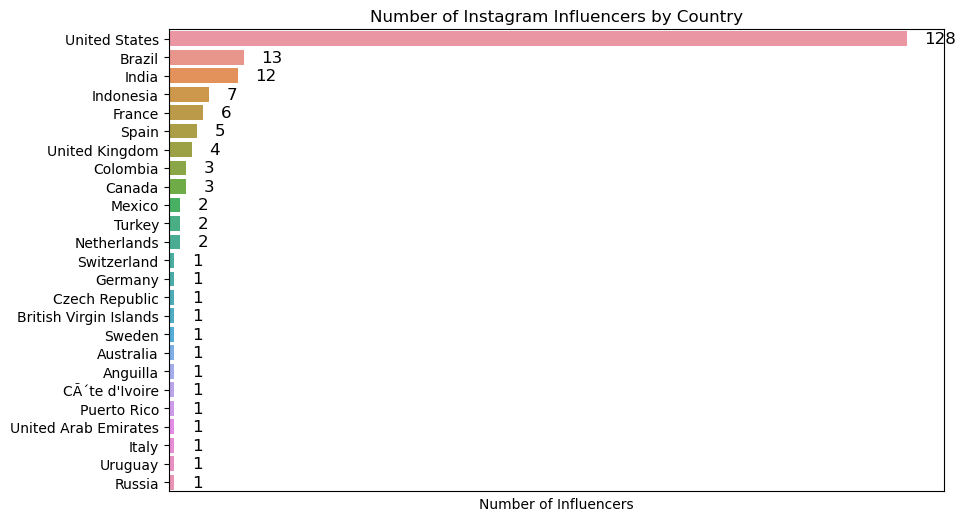

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count Instagram influencers by country
country_counts = df['country_or_region'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=country_counts.values, y=country_counts.index, orient='h')  # Use orient='h' for horizontal

# Add values on the bars
for i, v in enumerate(country_counts.values):
    ax.text(v + 3, i, str(v), va='center', fontsize=12)

plt.xlabel('Number of Influencers')
plt.ylabel('')  # Remove the y-axis label
plt.title('Number of Instagram Influencers by Country')

# Remove x-axis ticks and labels
plt.xticks([])

plt.show()

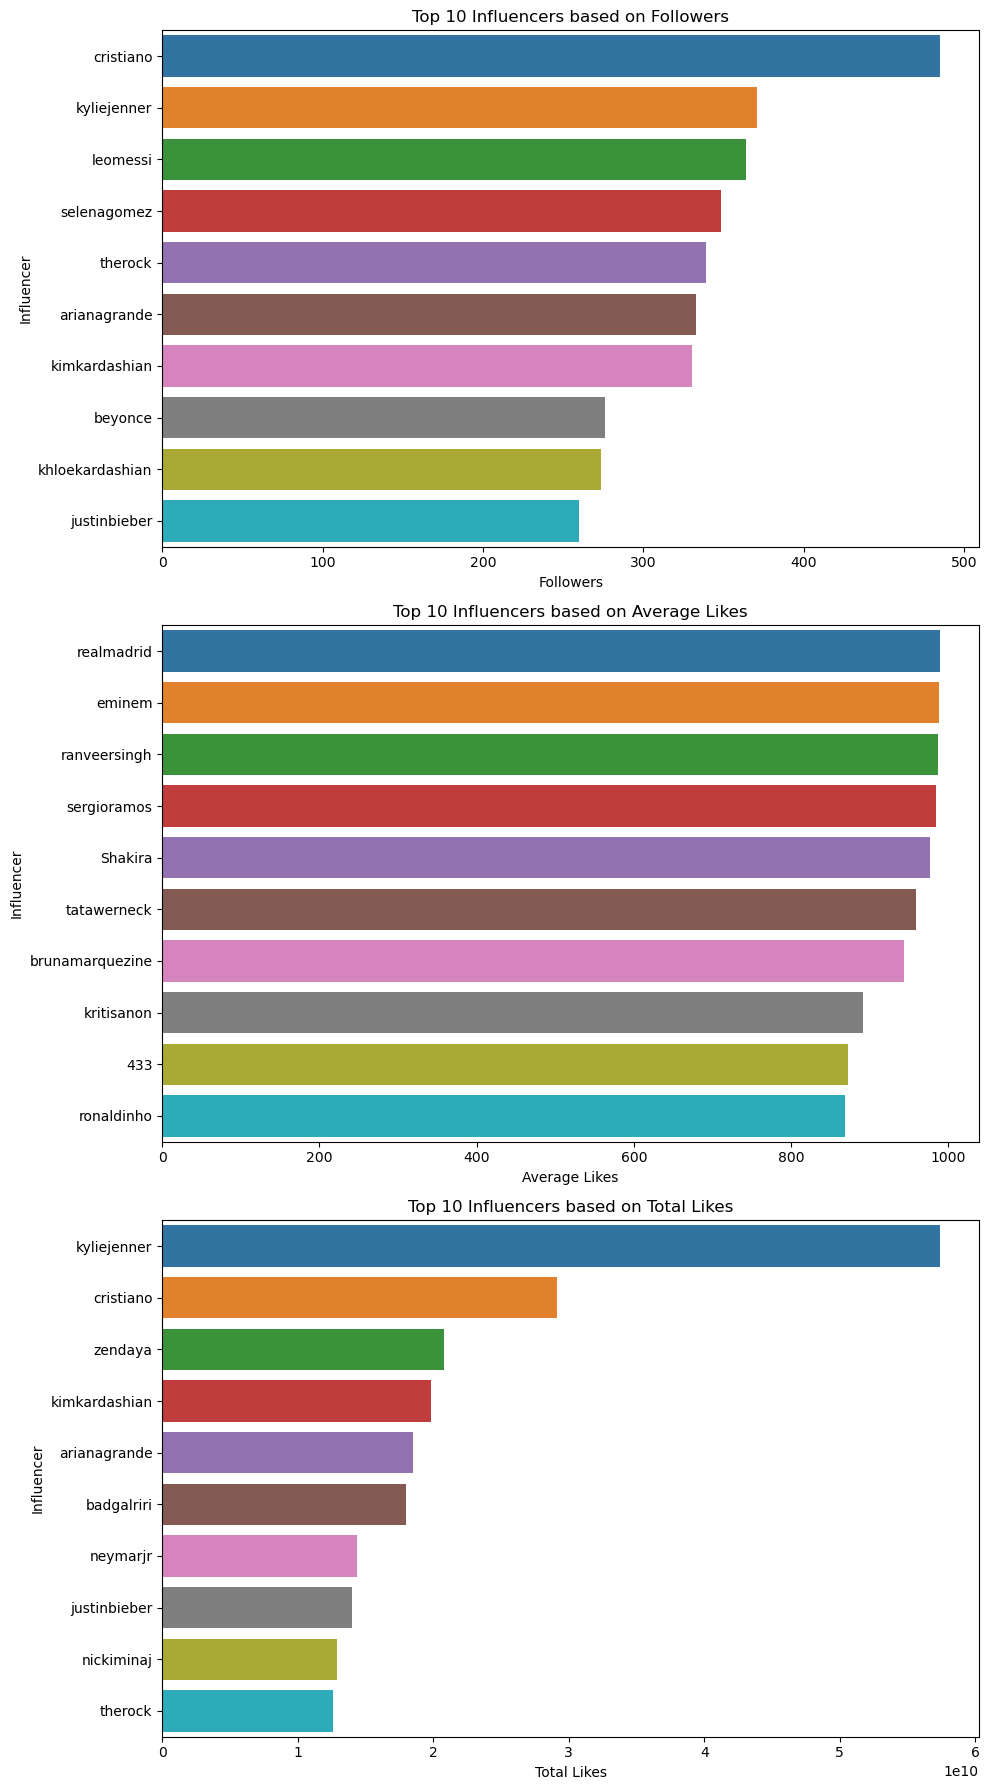

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 influencers based on Followers
top_followers = df.sort_values(by='followers', ascending=False).head(10)

# Top 10 influencers based on Average Likes
top_avg_likes = df.sort_values(by='avg_likes', ascending=False).head(10)

# Top 10 influencers based on Total Likes
top_total_likes = df.sort_values(by='total_likes', ascending=False).head(10)

# Create subplots for the three horizontal bar plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Plot the top influencers based on Followers
sns.barplot(x='followers', y='channel_info', data=top_followers, orient='h', ax=axes[0])
axes[0].set_xlabel('Followers')
axes[0].set_ylabel('Influencer')
axes[0].set_title('Top 10 Influencers based on Followers')

# Plot the top influencers based on Average Likes
sns.barplot(x='avg_likes', y='channel_info', data=top_avg_likes, orient='h', ax=axes[1])
axes[1].set_xlabel('Average Likes')
axes[1].set_ylabel('Influencer')
axes[1].set_title('Top 10 Influencers based on Average Likes')

# Plot the top influencers based on Total Likes
sns.barplot(x='total_likes', y='channel_info', data=top_total_likes, orient='h', ax=axes[2])
axes[2].set_xlabel('Total Likes')
axes[2].set_ylabel('Influencer')
axes[2].set_title('Top 10 Influencers based on Total Likes')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


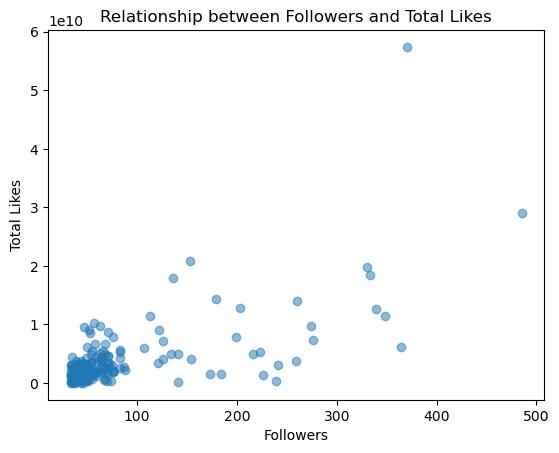

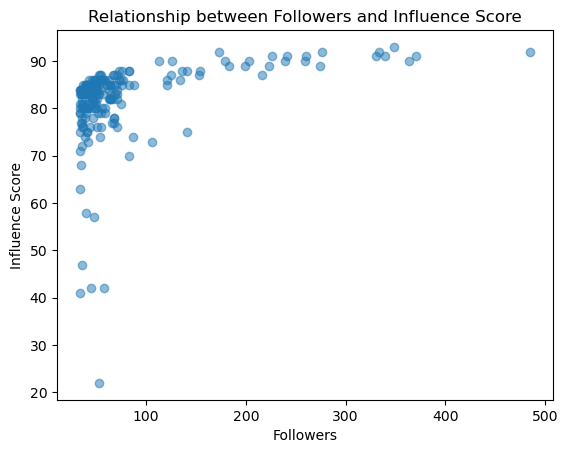

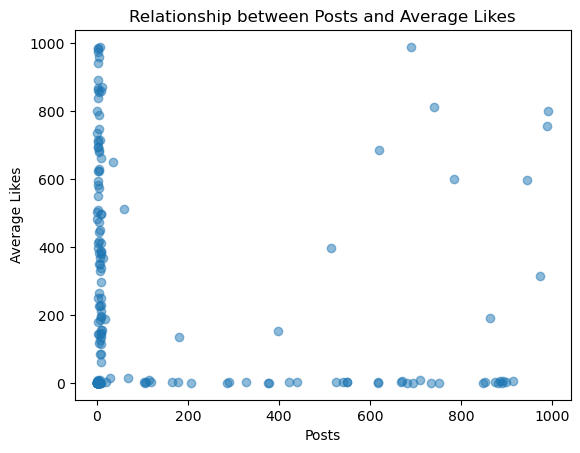

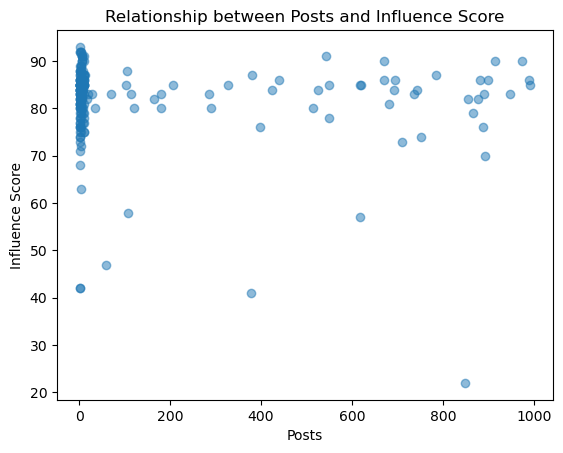

In [36]:
# Scatter plot: Followers and Total Likes
plt.scatter(df['followers'], df['total_likes'], alpha=0.5)
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.title('Relationship between Followers and Total Likes')
plt.show()

# Scatter plot: Followers and Influence Score
plt.scatter(df['followers'], df['influence_score'], alpha=0.5)
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.title('Relationship between Followers and Influence Score')
plt.show()

# Scatter plot: Posts and Average Likes
plt.scatter(df['posts'], df['avg_likes'], alpha=0.5)
plt.xlabel('Posts')
plt.ylabel('Average Likes')
plt.title('Relationship between Posts and Average Likes')
plt.show()

# Scatter plot: Posts and Influence Score
plt.scatter(df['posts'], df['influence_score'], alpha=0.5)
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.title('Relationship between Posts and Influence Score')
plt.show()
